In [1]:
from spectro_tomography import *

Text(0.5, 1.0, 'sinogram')

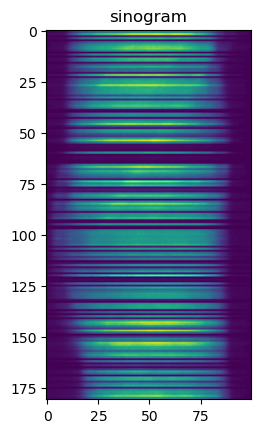

In [6]:
# loading experimental data of the test object
data_path = 'Experimental data\\NMC811\\'

# load the measured projection data
proj = tf.imread(f'{data_path}Co_proj.tif')

# load the experimental plan that contains the information about angle-enery pair used in the measurement
plan = np.loadtxt(f'{data_path}plan_cobalt.txt')

# load the angle list
angle = np.deg2rad(plan[:,0])

# the last column of the plan corresponds to the index number in the reference spectra at the given energy 
ind = np.array((plan[:,2]),dtype='int')

# load the reference spectra
ref_spectra = np.loadtxt(f'{data_path}Co-used-spect.txt')

# construct the codebook that is used in spectro-tomography computation
codebook = np.hstack((ref_spectra[ind,1].reshape((-1,1)),ref_spectra[ind,3].reshape((-1,1))))

sz = np.shape(proj)
plt.imshow(proj[:,sz[1]//2,:])
plt.title('sinogram')

data_size = 18100, rec_size = 10000


  0%|          | 0/100 [00:00<?, ?it/s]

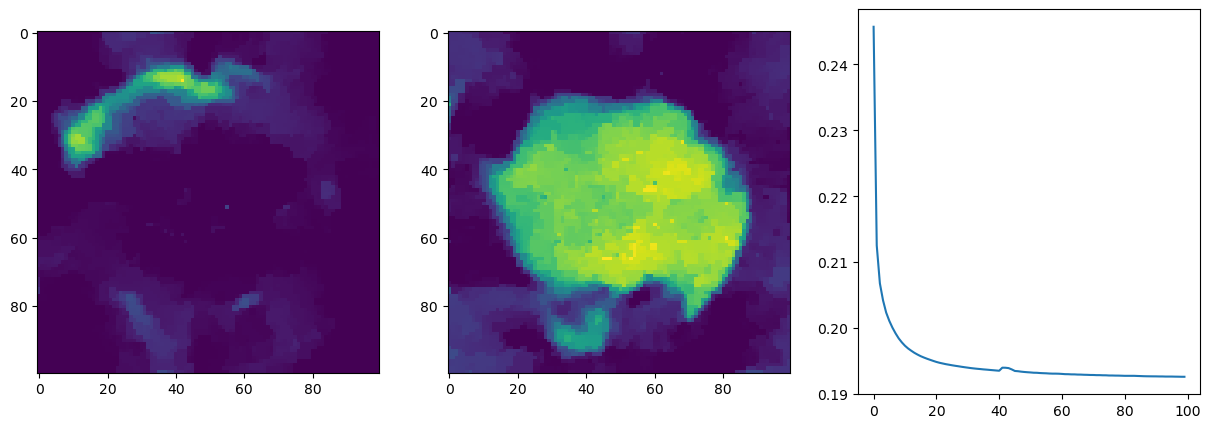

In [23]:
# reconstruct the central slice to determine optimal values for rotation axis offset, mu1 and mu2

rot_offset = -0.5
mu1 = 0.02
mu2 = 5
itr_num = 100

sino = proj[:,64,:]
row,col = np.shape(sino)
num_proj, num_state = np.shape(codebook)

rec,err = multistate_tomo_joint_TV(sino,angle,rot_offset,[col,col],codebook,mu1,mu2,itr_num)
for i in range(num_state):
    rec[i][rec[i]<0] = 0

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.imshow(rec[0])
plt.subplot(132)
plt.imshow(rec[1])
plt.subplot(133)
plt.plot(np.log10(err))

In [ ]:
# reconstruct the entire volumn

num_proj, row, col = np.shape(proj)
num_proj, num_state = np.shape(codebook)

vol_rec = []
for j in range(num_state):
    vol_rec.append(np.zeros((row,col,col)))
for i in tqdm(range(row)):
    sino = proj[:,i,:]
    rec,err = multistate_tomo_joint_TV(sino,angle,rot_offset,[col,col],codebook,mu1,mu2,itr_num)
    for j in range(num_state):
        rec[j][rec[j]<0] = 0
        vol_rec[j][i,:,:] = rec[j]